In [121]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
library(dplyr)
options(repr.matrix.max.rows = 6)

Title: Project Final Report


Introduction:
provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
clearly state the question you tried to answer with your project
identify and fully describe the dataset that was used to answer the question

In our project, we are using a dataset that contains information on players playing on Minecraft servers. This dataset contains the variables player experience, status on subscription to newsletter, hashed email, played hours, name, gender, and age. With this information, we are trying to answer the question, "We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts." To answer this, we used the dataset comparing different variables with played hours such as player experience and age.

Methods & Results:
describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
your report should include code which:
loads data 
wrangles and cleans the data to the format necessary for the planned analysis
performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
performs the data analysis
creates a visualization of the analysis 
note: all figures should have a figure number and a legend

To perform this analysis, we first print out the datasets containing the variables needed. Then, we wrangle and clean the data, removing all cells that contain 0 observations. After that, we summarize the data in groups such as age and total hours played, and we calculate means and medians. With these analyses, we then plot visualizations of the analyses and interpret our findings.

Discussion:
summarize what you found
discuss whether this is what you expected to find?
discuss what impact could such findings have?
discuss what future questions could this lead to?


With our results, we found that...




References
You may include references if necessary, as long as they all have a consistent citation style.


In [134]:
players <- read_csv("https://raw.githubusercontent.com/Chalkkk/dsci-final-group-project/refs/heads/main/data/players.csv") |>
           as_tibble()
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [135]:
players <- players |>
        rename(age = Age) |>
        select(experience, played_hours, age)
players

experience,played_hours,age
<chr>,<dbl>,<dbl>
Pro,30.3,9
Veteran,3.8,17
Veteran,0.0,17
⋮,⋮,⋮
Amateur,0.0,17
Amateur,2.3,17
Pro,0.2,NA


In [136]:
# by all data points
hours_played_sum <- players |>
                    summarize(max_played_hours = max(played_hours, na.rm = TRUE),
                              min_played_hours = min(played_hours, na.rm = TRUE),
                              total_played_hours = sum(played_hours, na.rm = TRUE),
                              average_played_hours = mean(played_hours, na.rm = TRUE),
                              median_played_hours = median(played_hours, na.rm = TRUE))                            
hours_played_sum

max_played_hours,min_played_hours,total_played_hours,average_played_hours,median_played_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
223.1,0,1145.8,5.845918,0.1


In [137]:
# Total and average played hours of players by experience level
hours_experience_sum <- players |>
                    group_by(experience) |>
                    summarize(total_played_hours = sum(played_hours, na.rm = TRUE),
                              average_played_hours = mean(played_hours, na.rm = TRUE),
                              median_played_hours = median(played_hours, na.rm = TRUE))
hours_experience_sum

experience,total_played_hours,average_played_hours,median_played_hours
<chr>,<dbl>,<dbl>,<dbl>
Amateur,379.1,6.0174603,0.1
Beginner,43.7,1.2485714,0.1
Pro,36.4,2.6000000,0.3
Regular,655.5,18.2083333,0.1
Veteran,31.1,0.6479167,0.1


In [138]:
# Maximum and minimum played hours for each experience level
hours_experience_range <- players |>
                    group_by(experience) |>
                    summarize(max_played_hours = max(played_hours, na.rm = TRUE),
                              min_played_hours = min(played_hours, na.rm = TRUE))
hours_experience_range

experience,max_played_hours,min_played_hours
<chr>,<dbl>,<dbl>
Amateur,150.0,0
Beginner,23.7,0
Pro,30.3,0
Regular,223.1,0
Veteran,12.5,0


In [139]:
# Total and average played hours of players by age
hours_age_sum <- players |>
                    group_by(age) |>
                    summarize(total_played_hours = sum(played_hours, na.rm = TRUE),
                              average_played_hours = mean(played_hours, na.rm = TRUE),
                              median_played_hours = median(played_hours, na.rm = TRUE))
print(as.data.frame(hours_age_sum))

   age total_played_hours average_played_hours median_played_hours
1    8                0.3            0.3000000                0.30
2    9               30.3           30.3000000               30.30
3   10                3.6            3.6000000                3.60
4   11                2.9            2.9000000                2.90
5   12                0.5            0.5000000                0.50
6   14               17.4            8.7000000                8.70
7   15                0.2            0.1000000                0.10
8   16              150.1           50.0333333                0.10
9   17              356.8            4.7573333                0.00
10  18                1.6            0.2285714                0.10
11  19              179.6           25.6571429                0.10
12  20              221.6           15.8285714                0.00
13  21               13.5            0.7500000                0.10
14  22               37.3            2.4866667                

In [140]:
# Maximum and minimum played hours for each age
hours_age_range <- players |>
                    group_by(age) |>
                    summarize(max_played_hours = max(played_hours, na.rm = TRUE),
                              min_played_hours = min(played_hours, na.rm = TRUE))
print(as.data.frame(hours_age_range))


   age max_played_hours min_played_hours
1    8              0.3              0.3
2    9             30.3             30.3
3   10              3.6              3.6
4   11              2.9              2.9
5   12              0.5              0.5
6   14             17.2              0.2
7   15              0.1              0.1
8   16            150.0              0.0
9   17            223.1              0.0
10  18              0.9              0.0
11  19            178.2              0.0
12  20            218.1              0.0
13  21              4.0              0.0
14  22             32.0              0.0
15  23             56.1              0.0
16  24             23.7              0.0
17  25              1.5              0.0
18  26              1.0              0.0
19  27             12.5              0.2
20  28              0.6              0.0
21  32              1.8              0.1
22  33              0.0              0.0
23  37              0.2              0.2
24  38          

In [141]:
hours_age_exp_sum <- players |>
             group_by(age, experience) |>
             summarize(total_played_hours = sum(played_hours, na.rm = TRUE),
                       average_played_hours = mean(played_hours, na.rm = TRUE),
                       median_played_hours = median(played_hours, na.rm = TRUE))
hours_age_exp_sum

`summarise()` has grouped output by 'age'. You can override using the `.groups`
argument.


age,experience,total_played_hours,average_played_hours,median_played_hours
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
8,Regular,0.3,0.3,0.3
9,Pro,30.3,30.3,30.3
10,Regular,3.6,3.6,3.6
⋮,⋮,⋮,⋮,⋮
50,Regular,0.0,0.0,0.0
NA,Pro,0.2,0.2,0.2
NA,Regular,0.1,0.1,0.1


In [142]:
hours_age_exp_range <- players |>
             group_by(age, experience) |>
             summarize(max_played_hours = max(played_hours, na.rm = TRUE),
                       min_played_hours = min(played_hours, na.rm = TRUE))
hours_age_exp_range

`summarise()` has grouped output by 'age'. You can override using the `.groups`
argument.


age,experience,max_played_hours,min_played_hours
<dbl>,<chr>,<dbl>,<dbl>
8,Regular,0.3,0.3
9,Pro,30.3,30.3
10,Regular,3.6,3.6
⋮,⋮,⋮,⋮
50,Regular,0.0,0.0
NA,Pro,0.2,0.2
NA,Regular,0.1,0.1


In [131]:
hours_exp_age_sum <- players |>
             group_by(experience, age) |>
             summarize(total_played_hours = sum(played_hours, na.rm = TRUE),
                       average_played_hours = mean(played_hours, na.rm = TRUE),
                       median_played_hours = median(played_hours, na.rm = TRUE))
hours_exp_age_sum

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,age,total_played_hours,average_played_hours,median_played_hours
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Amateur,11,2.9,2.9,2.9
Amateur,14,17.2,17.2,17.2
Amateur,16,150.0,75.0,75.0
⋮,⋮,⋮,⋮,⋮
Veteran,38,0.2,0.2,0.2
Veteran,44,0.1,0.1,0.1
Veteran,46,0.0,0.0,0.0


In [132]:
hours_exp_age_range <- players |>
             group_by(experience, age) |>
             summarize(max_played_hours = max(played_hours, na.rm = TRUE),
                       min_played_hours = min(played_hours, na.rm = TRUE))
hours_exp_age_range

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,age,max_played_hours,min_played_hours
<chr>,<dbl>,<dbl>,<dbl>
Amateur,11,2.9,2.9
Amateur,14,17.2,17.2
Amateur,16,150.0,0.0
⋮,⋮,⋮,⋮
Veteran,38,0.2,0.2
Veteran,44,0.1,0.1
Veteran,46,0.0,0.0


Figure 1: Bar graph which visualizes the average hours played by each experience level (from Beginner to Veteran)

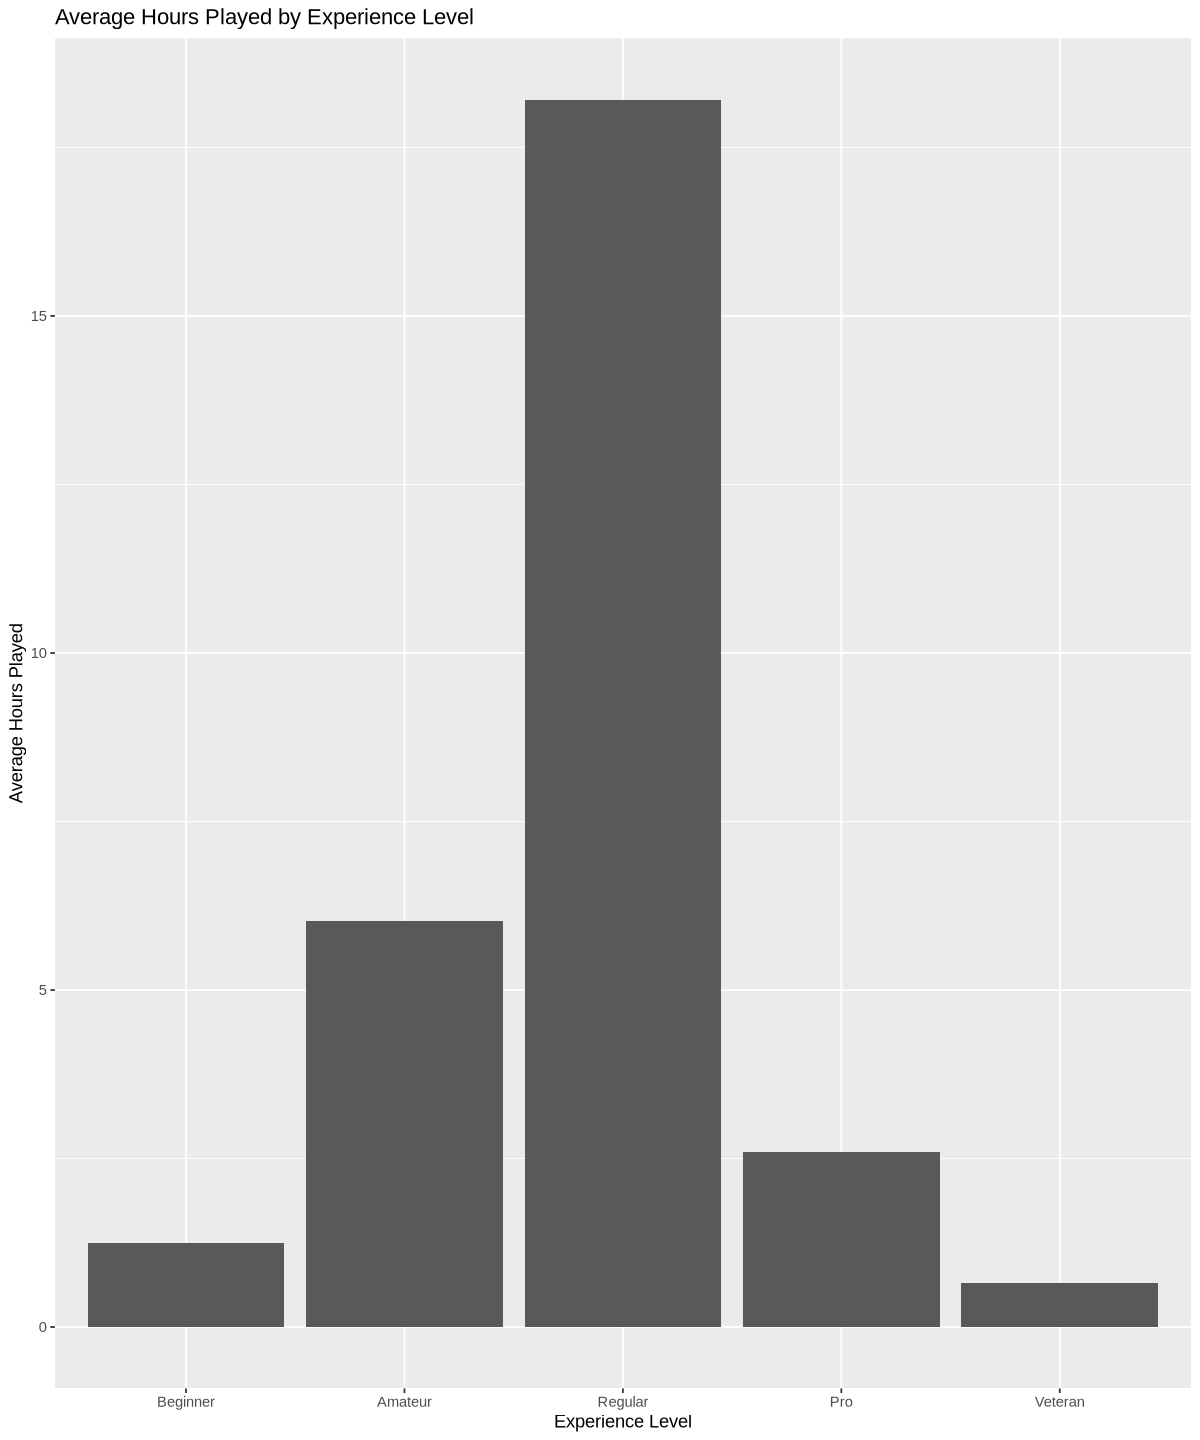

In [133]:
hours_experience_bars <- hours_experience_sum |>
    mutate(experience = factor(experience, levels = c("Beginner","Amateur","Regular","Pro","Veteran"))) |>
    ggplot(aes(x = experience, y = average_played_hours)) +
    geom_bar(stat = "identity") +
    labs(title = "Average Hours Played by Experience Level", x = "Experience Level", y = "Average Hours Played")

hours_experience_bars

Figure 2: Bar graph which visualizes the average hours played by each age (increasing increments)

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”


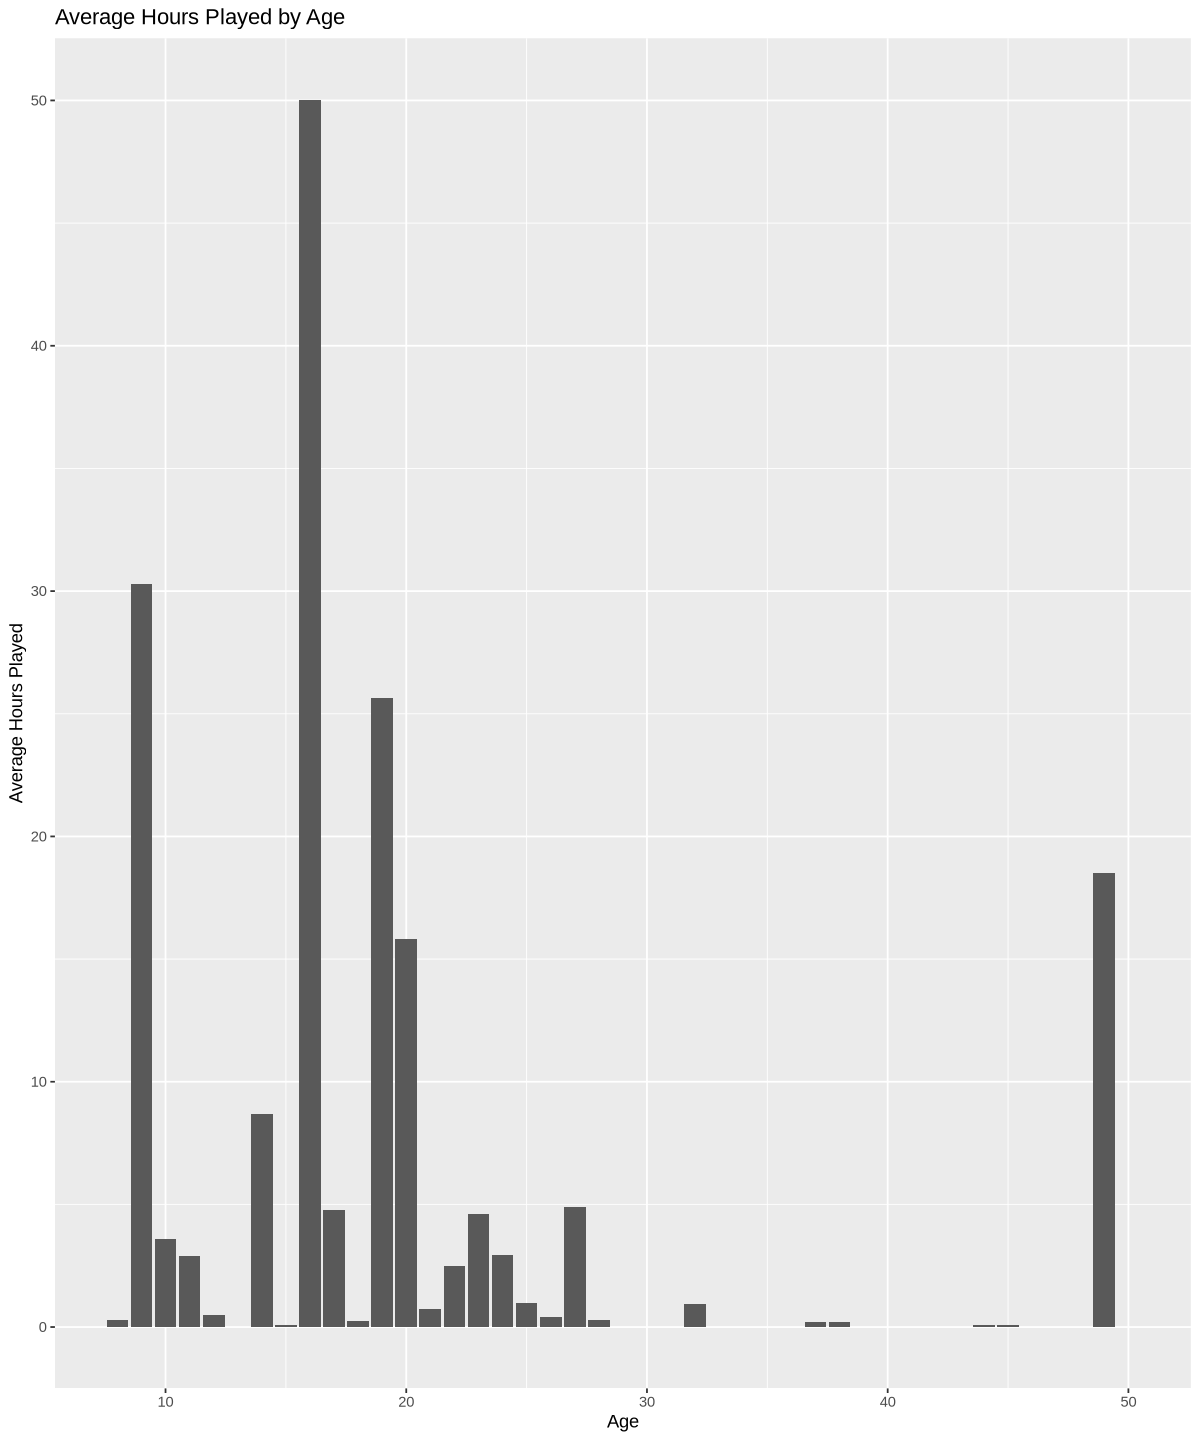

In [97]:
hours_age_bars <- hours_age_sum |>
    ggplot(aes(x = age, y = average_played_hours)) +
    geom_bar(stat = "identity") +
    labs(title = "Average Hours Played by Age", x = "Age", y = "Average Hours Played")

hours_age_bars


Figure 3: scatter plot of hours played vs age with the color being experience level. Best fit line made using regression was also added.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


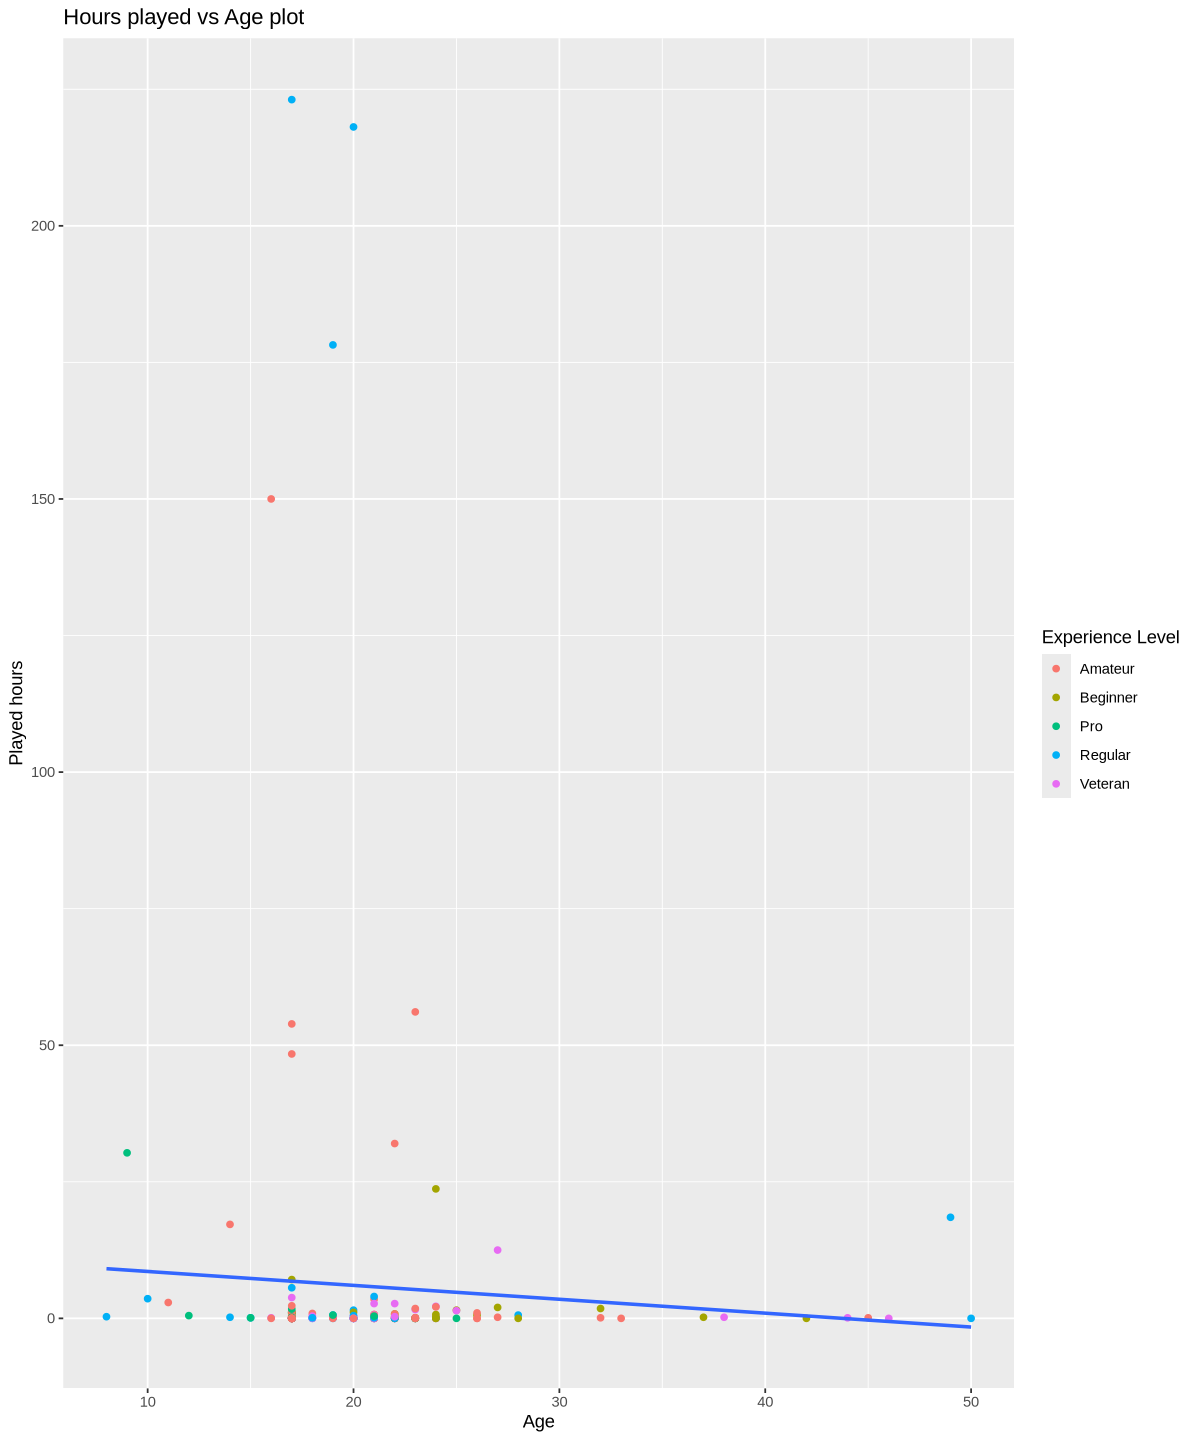

In [98]:
options(repr.plot.width = 10, repr.plot.height = 12)
hour_age_experience_plot <- players |>
    ggplot(aes(x = age, y = played_hours)) +
    geom_point(aes(color = experience)) + 
    geom_smooth(method = "lm", se = FALSE) +
    labs(title = "Hours played vs Age plot", color = "Experience Level", x = "Age", y = "Played hours")

hour_age_experience_plot


From Figure 1, we found that players with the "regular" experience level have the most average hours played with amateur being the experience level with the second most average hours. 

From Figure 2, we found that players that are 16 years old have the most average hours played, followed by age 9 and age 19; we can also see that most players that have higher hours played are younger. 

In Figure 3, we can see some possible issues with our analyzation of Figures 1 and 2. We noticed that there are many outliers which could skew the results of the bar graphs; these outliers are affect the mean especially hard because a majority of the playtimes are very low (the medians are all less or equal to 0.3). In the case of experience level, there are a few players with "regular" experience that have hours played that are over 175; there is also an outlier for the amateur level with 150 hours played. In the case of age, there is an outlier of 223.1 hours played for age 17, 223.1 hours played for age 20, 178.2 hours played for age 19, and 150 hours played for age 16.